### The aim of this model is to find the best feature to predict whether the customer will make a claim (1) or not (0)



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [69]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('car_insurance.csv')
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [70]:
# data types
df.info()

# annual_mileage and credit_score contain NULLs
# both have a "float" data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [71]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [72]:
# checking for columns with NULLs
null_columns = []
for col in df.isna().any()[df.isna().any() == True].index:
    null_columns.append(col)

null_columns

['credit_score', 'annual_mileage']

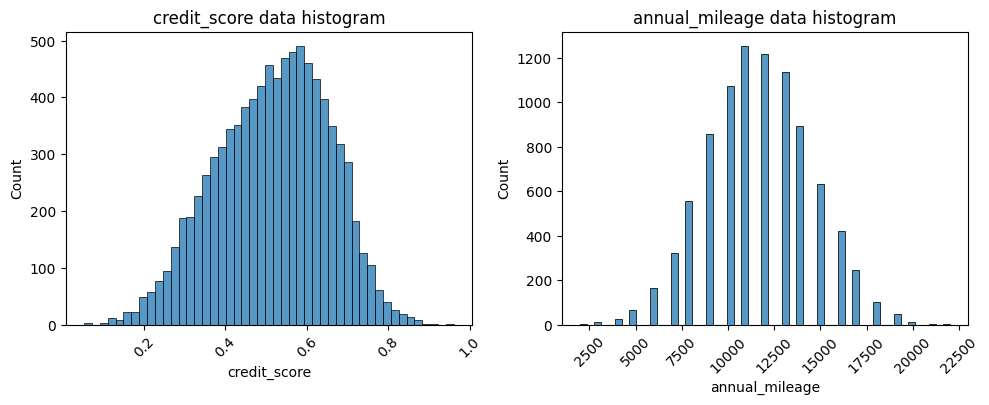

In [89]:

plt.figure(figsize = (10, 4))
i = 1
for col in null_columns:
    plt.subplot(1, 2, i)
    sns.histplot(x=df[col])
    plt.title(f'{col} data histogram')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.plot()
    i += 1

# both of those are normally distributed, which means that nulls will be replaced with mean

In [90]:
# replacing missing values
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())
df.isna().any() # checking if replaced correctly

id                     False
age                    False
gender                 False
driving_experience     False
education              False
income                 False
credit_score           False
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage         False
vehicle_type           False
speeding_violations    False
duis                   False
past_accidents         False
outcome                False
dtype: bool

In [91]:
# selecting features for modeling and a variable for storing models
models = []
features = df.iloc[:, 1:-1].columns # everything except for id and outcome (because it's a dependent variable)
features

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')

In [92]:
# creating a separate model for every feature
for col in features:
    x = df[col]
    y = df['outcome']
    if x.dtype == object:
       x = pd.get_dummies(x, drop_first=True).astype(int) # .astype(int) had to be used here to change True into 1 and False into 0
    x = sm.add_constant(x) # adding a constant to regression 
    log_reg = sm.Logit(y, x).fit()
    models.append(log_reg) 

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [93]:
# calculating accuracies
accuracies = []
for i in range(len(models)):
    conf_matrix = models[i].pred_table() # confusion matrix (or prediction table)
    true_negative = conf_matrix[0, 0] # true negative = actual 0, predicted 0 - top left
    true_positive = conf_matrix[1, 1] # true positive = actual 1, predicted 1 - bottom right
    false_negative = conf_matrix[1, 0] # false negative = actual 1, predicted 0 - bottom left
    false_positive = conf_matrix[0, 1] # false positive = actual 0, predicted 1 - top right
    accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_negative + false_positive) # accuracy = (TN + TP) / (TN + TP + FN + FP)
    accuracies.append(accuracy)
    
max_index = accuracies.index(max(accuracies)) # identifying the model with the highest accuracy
accuracies

[np.float64(0.7747),
 np.float64(0.6867),
 np.float64(0.7771),
 np.float64(0.6867),
 np.float64(0.7425),
 np.float64(0.7054),
 np.float64(0.7351),
 np.float64(0.6867),
 np.float64(0.6867),
 np.float64(0.6867),
 np.float64(0.6867),
 np.float64(0.6904),
 np.float64(0.6867),
 np.float64(0.6867),
 np.float64(0.6867),
 np.float64(0.6867)]

In [94]:
# displaying results
best = {}
best['best_feature'] = features[max_index]
best['best_accuracy'] = max(accuracies)
best_feature_df = pd.DataFrame(best, index=[0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
